#### The goal of Clustering is to maximize the similarity between the observations within a cluster and maximize the dissimilarity between the clusters. 

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
import seaborn as sns
sns.set()

In [239]:
raw_data = pd.read_csv("CC GENERAL.csv")
raw_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [240]:
raw_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [241]:
# Look for missing values

def col_na_count(df):
    for i in df.columns:
        na_num = len(df[i][df[i].isna()])
        if na_num>0:
            print(na_num,'\t',i)
            
col_na_count(raw_data)

1 	 CREDIT_LIMIT
313 	 MINIMUM_PAYMENTS


In [251]:
# Columns and their respective unique data

print("Number of unique values in each column:")
for i in raw_data.columns:
    print(len(raw_data[i].unique()),'\t:',i)
    
raw_data.TENURE.unique()

Number of unique values in each column:
8949 	: CUST_ID
8870 	: BALANCE
43 	: BALANCE_FREQUENCY
6203 	: PURCHASES
4014 	: ONEOFF_PURCHASES
4452 	: INSTALLMENTS_PURCHASES
4322 	: CASH_ADVANCE
47 	: PURCHASES_FREQUENCY
47 	: ONEOFF_PURCHASES_FREQUENCY
47 	: PURCHASES_INSTALLMENTS_FREQUENCY
54 	: CASH_ADVANCE_FREQUENCY
65 	: CASH_ADVANCE_TRX
173 	: PURCHASES_TRX
205 	: CREDIT_LIMIT
8710 	: PAYMENTS
8636 	: MINIMUM_PAYMENTS
47 	: PRC_FULL_PAYMENT
7 	: TENURE


array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

In [252]:
# Handle the missing values

raw_data['MINIMUM_PAYMENTS'].fillna(raw_data['MINIMUM_PAYMENTS'].mean(),inplace=True)
raw_data['MINIMUM_PAYMENTS']

0        139.509787
1       1072.340217
2        627.284787
3        864.206542
4        244.791237
           ...     
8945      48.886365
8946     864.206542
8947      82.418369
8948      55.755628
8949      88.288956
Name: MINIMUM_PAYMENTS, Length: 8949, dtype: float64

In [243]:
# Check for duplicate values

print(raw_data.shape)
raw_data = raw_data.drop_duplicates()
raw_data = raw_data.dropna()
print(raw_data.shape)

(8950, 18)
(8949, 18)


In [244]:
raw_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [138]:
# Correlation

def corr(df,lim):
    sort_corr = df.corr().abs().unstack().sort_values()
    high_corr = sort_corr[sort_corr>=lim].drop_duplicates()
    print(high_corr)

In [142]:
corr(raw_data,0.70)

CASH_ADVANCE_TRX     CASH_ADVANCE_FREQUENCY              0.799573
PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY    0.862921
ONEOFF_PURCHASES     PURCHASES                           0.916844
BALANCE              BALANCE                             1.000000
dtype: float64


In [182]:
dataset = raw_data.iloc[:,1:18]
dataset
dataset1 = dataset

In [183]:
dataset_standardized = preprocessing.scale(dataset)
dataset_standardized = pd.DataFrame(dataset_standardized)
print(dataset_standardized)

             0         1         2         3         4         5         6  \
0    -0.732054 -0.249881 -0.424934 -0.356957 -0.349114 -0.466805 -0.806649   
1     0.786858  0.134049 -0.469584 -0.356957 -0.454607  2.605438 -1.221928   
2     0.447041  0.517980 -0.107716  0.108843 -0.454607 -0.466805  1.269742   
3     0.049015 -1.017743  0.231995  0.546123 -0.454607 -0.368678 -1.014290   
4    -0.358849  0.517980 -0.462095 -0.347317 -0.454607 -0.466805 -1.014290   
...        ...       ...       ...       ...       ...       ...       ...   
8944 -0.738015  0.517980 -0.333331 -0.356957 -0.132688 -0.466805  1.269742   
8945 -0.742488  0.517980 -0.329174 -0.356957 -0.122869 -0.466805  1.269742   
8946 -0.740463 -0.185895 -0.402000 -0.356957 -0.294930 -0.466805  0.854463   
8947 -0.745239 -0.185895 -0.469584 -0.356957 -0.454607 -0.449373 -1.221928   
8948 -0.572644 -0.889766  0.042092  0.301677 -0.454607 -0.406228  0.439186   

             7         8         9        10        11        1

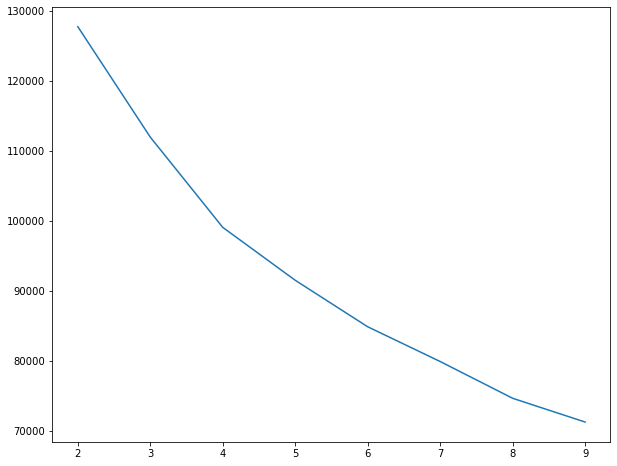

In [184]:
# The Elbow method 
plt.figure(figsize=(10,8))
# WCSS ----> Within Cluster Sum of Squares
wcss = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(dataset_standardized)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2,10),wcss)
plt.show()

In [171]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(dataset_standardized)
    labels = kmeans.labels_
    sil.append(silhouette_score(dataset_standardized, labels, metric = 'euclidean'))

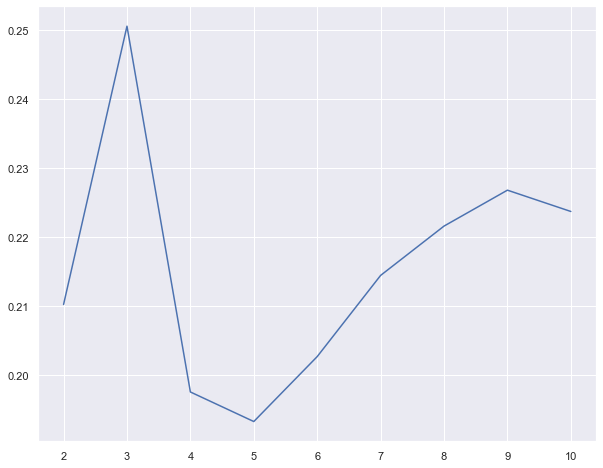

In [208]:
plt.figure(figsize=(10,8)) 
plt.plot(range(2,11),sil)
plt.show()

In [202]:
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=42)

In [203]:
y_kmeans = kmeans.fit_predict(dataset_standardized)

In [204]:
y_kmeans1 = y_kmeans
y_kmeans1 = y_kmeans + 1

In [205]:
cluster = pd.DataFrame(y_kmeans1)
dataset1['Cluster'] = cluster

In [206]:
kmeans_mean_cluster = pd.DataFrame(round(dataset1.groupby('Cluster').mean(),1))
kmeans_mean_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
1.0,2112.2,0.9,3500.4,2237.6,1262.8,554.4,0.8,0.6,0.6,0.1,1.8,46.1,7216.1,3630.4,1207.4,0.3,11.9
2.0,995.2,0.9,631.4,337.1,294.5,555.8,0.5,0.2,0.3,0.1,2.1,10.2,3541.7,1135.6,644.0,0.2,11.5
3.0,3324.8,0.9,505.5,303.9,202.3,2926.8,0.3,0.1,0.2,0.3,8.7,7.9,6050.3,2563.4,1444.5,0.1,11.5


In [236]:
dataset1.groupby('Cluster').count()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
1.0,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230,1230
2.0,6120,6120,6120,6120,6120,6120,6120,6120,6120,6120,6120,6120,6120,6120,6120,6120,6120
3.0,1598,1598,1598,1598,1598,1598,1598,1598,1598,1598,1598,1598,1598,1598,1598,1598,1598
